In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
FIGSIZE = figsize=(12,8)

In [2]:
from pandas_datareader import data as wb

In [3]:
assets = ['TSLA', 'GOOG']
start = "2015-01-01"
myData = pd.DataFrame()
for a in assets:
    myData[a] = wb.DataReader(a, 'google', start=start)['Close']

In [4]:
myData.tail()

,TSLA,GOOG
Date,,
2017-05-22,310.35,941.86
2017-05-23,303.86,948.82
2017-05-24,310.22,954.96
2017-05-25,316.83,969.54
2017-05-26,325.14,971.47


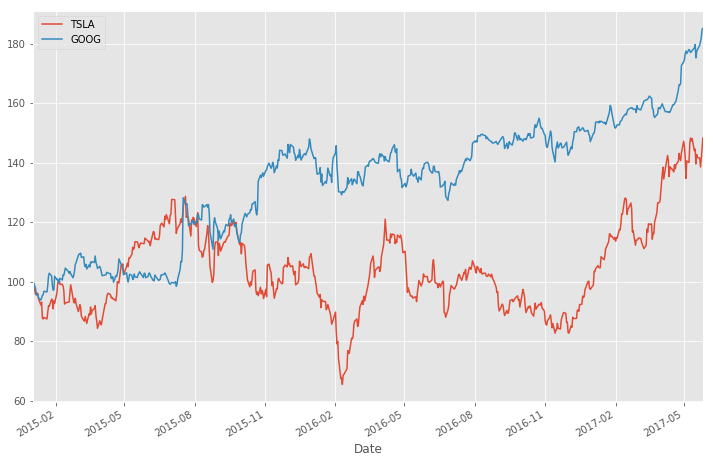

In [7]:
#(mydata/mydata.iloc[0]*100).plot(figsize=(16,12))
(myData / myData.iloc[0] * 100).plot(figsize=FIGSIZE)


##### Log Returns

In [14]:
log_returns = np.log(myData / myData.shift(1))

##### Mean of Returns Annualized

In [15]:
log_returns.mean() * 250

TSLA    0.162984
GOOG    0.254873
dtype: float64

##### cov() of Log Returns Annualized

In [17]:
log_returns.cov() * 250

,TSLA,GOOG
TSLA,0.145492,0.025705
GOOG,0.025705,0.053909


In [18]:
log_returns.corr()

,TSLA,GOOG
TSLA,1.000000,0.290245
GOOG,0.290245,1.000000


##### Portfolio Optimization

In [20]:
num_assets = len(assets)
num_assets

2

##### Create 2 random weights

In [21]:
arr = np.random.random(2)
arr

array([ 0.7366614,  0.1604462])

In [22]:
arr[0] + arr[1]

0.89710760389418409

##### Incrementing enables *w1* / w1 + w2 & *w2* / w1 + w2

In [26]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.02346947,  0.97653053])

##### Expected Portfolio Return

In [27]:
np.sum(weights * log_returns.mean() * 250)

0.25271679149238074

##### Expected Portfolio Variance

In [28]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.052667073363492523

##### Expected Portfolio Volitility

In [29]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.22949307911894101

##### Run a 1000 simulations

In [32]:
portfolio_returns = []
portfolio_vol = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    portfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolio_vol

([0.2072219907476641,
  0.19782654862352342,
  0.22215649157739206,
  0.1966377280287346,
  0.20240273310511622,
  0.17969138884659566,
  0.20540113867582116,
  0.23106732847699765,
  0.1976168545309922,
  0.20938267594230453,
  0.20711084927838772,
  0.19008599067308496,
  0.211858784606652,
  0.18309373083896746,
  0.18496799407375603,
  0.24419732359395122,
  0.22859125169488662,
  0.23946145683086617,
  0.2283094870334954,
  0.22513350105649016,
  0.1878953277783987,
  0.22280713271332875,
  0.19764284516905584,
  0.23722048849130656,
  0.16595430324741492,
  0.20188343527613553,
  0.17341052510619787,
  0.18490460860581856,
  0.20834821649022786,
  0.19926095091105528,
  0.18667715127589019,
  0.2374087094303083,
  0.19695385520606193,
  0.20684913242520342,
  0.17356452206907158,
  0.1751249439463053,
  0.24685928479130398,
  0.23201114732791953,
  0.25324904814198806,
  0.2123098827878006,
  0.17128155418284124,
  0.2164351781925632,
  0.16670888712795573,
  0.20074956862860827,

##### Convert the above code into numpy arrays

In [40]:
portfolio_returns = []
portfolio_vol = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    portfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
portfolio_returns = np.array(portfolio_returns)
portfolio_vol = np.array(portfolio_vol)

portfolio_returns, portfolio_vol

(array([ 0.1935919 ,  0.22203825,  0.16533755,  0.19863797,  0.21274566,
         0.23907357,  0.22665599,  0.24217609,  0.2094477 ,  0.20768313,
         0.21379153,  0.19365398,  0.20850692,  0.19263102,  0.17432908,
         0.1859916 ,  0.22980035,  0.20455223,  0.20788416,  0.20338213,
         0.24343227,  0.21536989,  0.21690759,  0.16602809,  0.17248656,
         0.18659439,  0.22322976,  0.209897  ,  0.2015534 ,  0.19886642,
         0.25401166,  0.19224834,  0.16782058,  0.16663133,  0.219328  ,
         0.20807765,  0.19978947,  0.19887175,  0.21144733,  0.19499788,
         0.21151835,  0.20546784,  0.17639735,  0.21906007,  0.21327107,
         0.19258074,  0.21344124,  0.20436755,  0.22651085,  0.18516392,
         0.22471811,  0.20576875,  0.21963792,  0.24148727,  0.25287571,
         0.20037773,  0.23612032,  0.20793844,  0.22099925,  0.20417165,
         0.22145221,  0.17373502,  0.24606825,  0.18659705,  0.19380019,
         0.18780186,  0.21263509,  0.22415667,  0.2

##### Now put the data into a DataFrame

In [41]:
portfolio = pd.DataFrame({'return': portfolio_returns, 'volitility': portfolio_vol})
portfolio.head()

,return,volitility
0,0.193592,0.286551
1,0.222038,0.229454
2,0.165338,0.373434
3,0.198638,0.273524
4,0.212746,0.243216


In [42]:
portfolio.tail()

,return,volitility
995,0.204267,0.260251
996,0.230509,0.222165
997,0.220200,0.231724
998,0.225192,0.226118
999,0.253926,0.230963


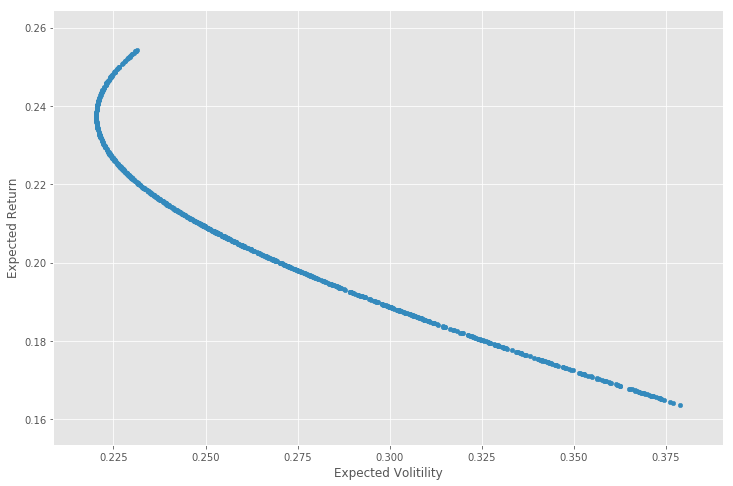

In [43]:
portfolio.plot(x='volitility', y='return', kind='scatter', figsize=FIGSIZE)
plt.xlabel('Expected Volitility')
plt.ylabel('Expected Return');